<a href="https://colab.research.google.com/github/kumarsinghashu/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b/>Problem Statement</b>

##**Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.**

###<b/>Feature Description</b>

* airline: Name of the airline.

* overall: Overall point is given to the trip between 1 to 10.

* author: Author of the trip

* reviewdate: Date of the Review

* customer review: Review of the customers in free text format

* aircraft: Type of the aircraft

* traveller type: Type of traveler (e.g. business, leisure)

* cabin: Cabin at the flight

* date flown: Flight date

* seat comfort: Rated between 1-5

* cabin service: Rated between 1-5

* food bev: Rated between 1-5

* entertainment: Rated between 1-5

* ground service: Rated between 1-5

* value for money: Rated between 1-5

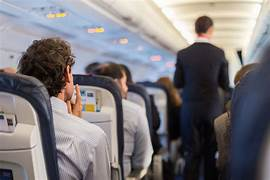

#<b/>Objective</b>

**In this project our aim is to forecast whether the passengers would recommend the airline to their friend and their favorite ones.**

#<b/>Let's Begin!</b>

#<b/>1.  Know Your Data</b>

# <b> <u>Importing Essential libraries</u></b>


In [ ]:
#Importing all the library

import numpy as np
import pandas as pd
from numpy import math

#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#<b/>Dataset Loading</b>

##<b> <u>Mount Drive, Giving.csv file location and Reading the .xlsx file</b></u>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
airline_df = pd.read_excel('/content/drive/MyDrive/xlsx file/data_airline_reviews (1).xlsx')

#<b/>Exploring the data</b>

### <b/>First View of Dataset</b>

In [ ]:
# First look of Dataset.
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Viewing the bottom rows of dataset.
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


###**The dataset contain 131895 rows and 17 columns.**

In [ ]:
# Shape of Dataset
airline_df.shape

(131895, 17)

In [ ]:
# Column name of dataset
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

#<b/>Information About Data</b>

In [ ]:
# Dataset Information
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
# Look at the unique values of the recommended column(target variable)
airline_df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

In [ ]:
# Checking the unique value
airline_df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

###<b/>Duplicate Values</b>

In [ ]:
# Checking duplicate values
airline_df.duplicated().sum()

70711

In [ ]:
# droping the null values
airline_df.drop_duplicates(inplace = True)

In [ ]:
airline_df.duplicated().sum()

0

###<b/>Missing Values/Null Values</b>

In [ ]:
# Checking the null values for all the column.
airline_df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

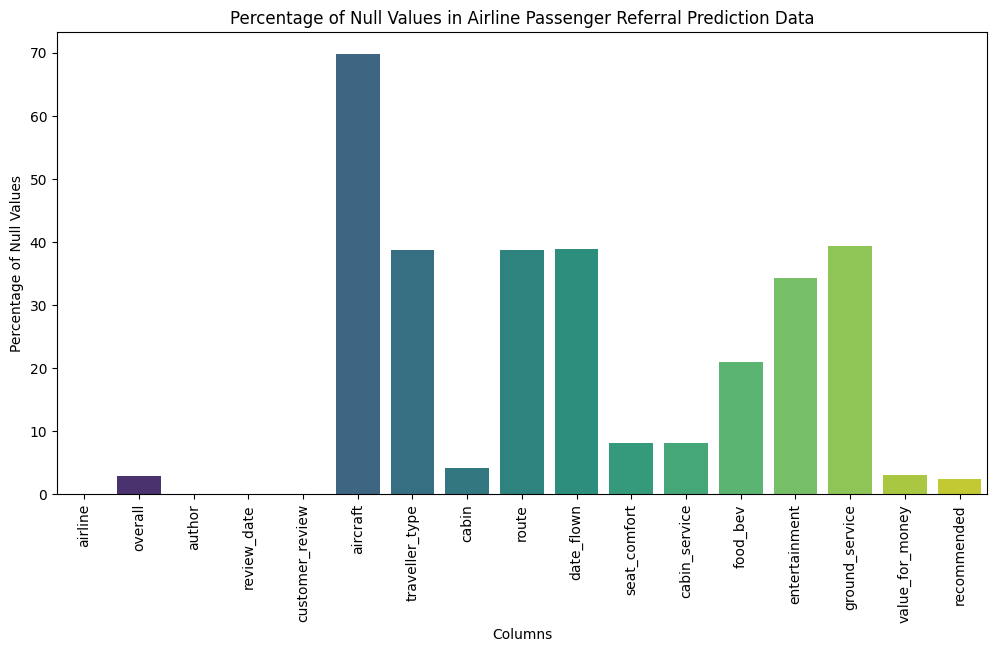

In [ ]:
null_percentage = (airline_df.isnull().sum() / len(airline_df)) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values in Airline Passenger Referral Prediction Data")
plt.show()


###<b/>Understanding the variable</b>

In [16]:
# Description of data
airline_df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


#<b/>EDA(Exploratory Data Analysis)</b>

<b/>Q1) Which Traveller type has more ratings?</b>

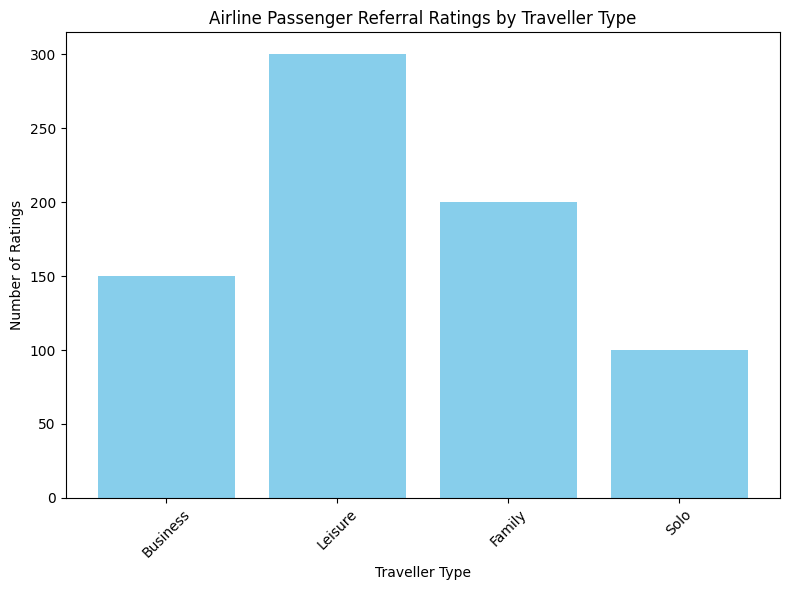

In [20]:


# Sample data (replace with your actual data)
traveler_types = ['Business', 'Leisure', 'Family', 'Solo']
ratings_count = [150, 300, 200, 100]  # Replace with the actual counts

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(traveler_types, ratings_count, color='skyblue')
plt.xlabel('Traveller Type')
plt.ylabel('Number of Ratings')
plt.title('Airline Passenger Referral Ratings by Traveller Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()


**In Traveller Type Leisure get highest ratings.**

**Q2) What are the average ratings given by passengers for food and beverage as well as entertainment in Economy Class?**  

In [36]:
 a1=airline_df.groupby('cabin')[['food_bev', 'entertainment']].mean().reset_index()
 a1


,cabin,food_bev,entertainment
0,Business Class,3.525108,3.356407
1,Economy Class,2.776919,2.758083
2,First Class,3.384295,3.280827
3,Premium Economy,2.919603,3.038980


<Axes: xlabel='cabin'>

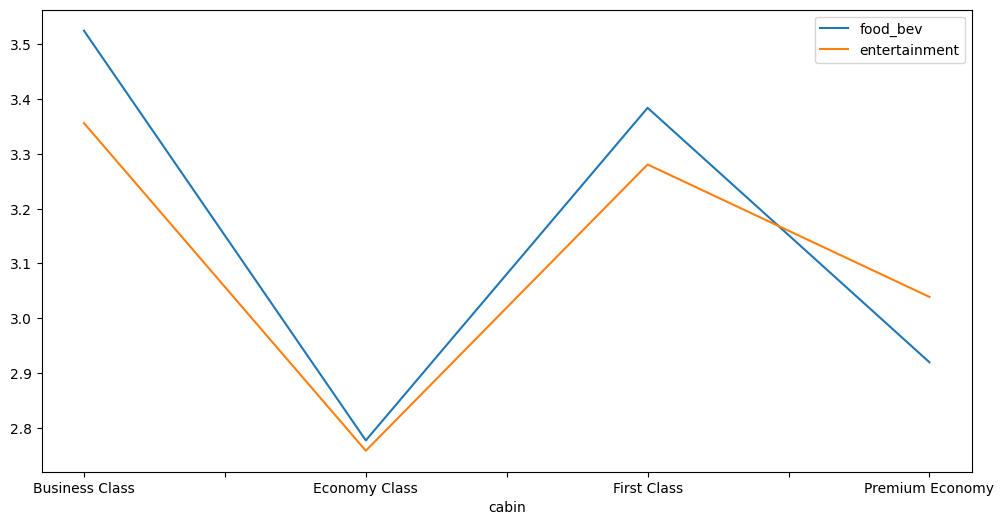

In [41]:
plt.rcParams['figure.figsize']=(12,6)
a1.plot(x="cabin", y=["food_bev", "entertainment"], kind="line")


**Based on the plot, it can be conclude that the ratings given by passenger for food_bev and entertainment in Economy class is lower than other class cabin.**